In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
TABLE_DIR = "tables"

In [12]:
# https://data.cso.ie/table/RIH02
rental_data = pd.read_csv(os.path.join(TABLE_DIR, "RIH02.20211118T121153.csv"))
rental_data

,Statistic,HalfYear,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Carlow,Euro,759.62
1,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Carlow Town,Euro,NaN
2,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,"Graiguecullen, Carlow",Euro,749.54
3,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,"Tullow, Carlow",Euro,729.30
4,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Cavan,Euro,583.96
...,...,...,...,...,...,...,...
12037,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Delgany, Wicklow",Euro,1565.79
12038,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Greystones, Wicklow",Euro,1761.74
12039,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Kilcoole, Wicklow",Euro,NaN
12040,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Newtownmountkennedy, Wicklow",Euro,NaN


In [36]:
study_data = rental_data.loc[~rental_data["VALUE"].isnull()]
# Let's remove locations with missing data.
locations = list(study_data["Location"])
location_data_points = list(({location: locations.count(location) for location in set(locations)}).items())
expected_data_points_per_location = max(location[1] for location in location_data_points)
study_locations = [data_point[0] for data_point in location_data_points if data_point[1] == expected_data_points_per_location]
study_data = study_data.loc[rental_data["Location"].isin(study_locations)]
study_data

,Statistic,HalfYear,Number of Bedrooms,Property Type,Location,UNIT,VALUE
0,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Carlow,Euro,759.62
3,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,"Tullow, Carlow",Euro,729.30
4,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Cavan,Euro,583.96
5,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,Cavan Town,Euro,570.09
8,RTB Average Monthly Rent Report,2008H1,All bedrooms,All property types,"Ballyjamesduff, Cavan",Euro,611.57
...,...,...,...,...,...,...,...
12034,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Baltinglass, Wicklow",Euro,942.46
12035,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Blessington, Wicklow",Euro,1424.29
12036,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Bray, Wicklow",Euro,1391.88
12037,RTB Average Monthly Rent Report,2021H1,All bedrooms,All property types,"Delgany, Wicklow",Euro,1565.79


In [37]:
pd.DataFrame(
    {
        "Mean sale price": study_data["VALUE"].tolist(), 
    },
    index=study_data["HalfYear"].unique()
).plot.bar()

ValueError: Shape of passed values is (8748, 1), indices imply (27, 1)

<AxesSubplot:>

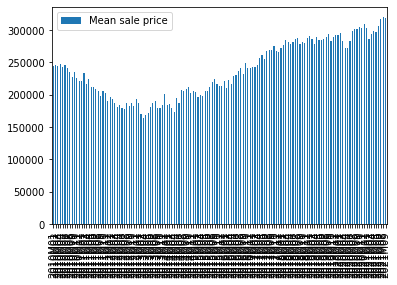

In [30]:
ftboo = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - First-Time Buyer Owner-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": ftboo["VALUE"].tolist(), 
    },
    index=ftboo["Month"].unique()
).plot.bar()

<AxesSubplot:>

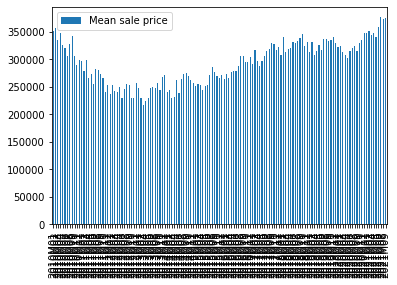

In [31]:
foo = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - Former Owner-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": foo["VALUE"].tolist(), 
    },
    index=foo["Month"].unique()
).plot.bar()

<AxesSubplot:>

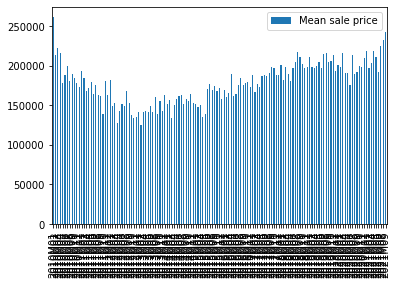

In [32]:
no = filtered.loc[buyer_data["Type of Buyer"] == "Household Buyer - Non-Occupier"]
pd.DataFrame(
    {
        "Mean sale price": no["VALUE"].tolist(), 
    },
    index=no["Month"].unique()
).plot.bar()

In [33]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), ftboo["VALUE"].tolist())

array([[1.        , 0.98143645],
       [0.98143645, 1.        ]])

In [36]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), foo["VALUE"].tolist())

array([[1.        , 0.96366684],
       [0.96366684, 1.        ]])

In [35]:
# Pearson product-moment correlation coefficients.
np.corrcoef(all_buyers["VALUE"].tolist(), no["VALUE"].tolist())

array([[1.        , 0.89676878],
       [0.89676878, 1.        ]])